**Load the Dataset**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AI_CS_Synergy/network_traffic.csv')
data.head()

,timestamp,ip_address,traffic_size
0,2024-11-06 00:00:00,192.168.0.0,388
1,2024-11-06 00:01:00,192.168.0.1,320
2,2024-11-06 00:02:00,192.168.0.2,348
3,2024-11-06 00:03:00,192.168.0.3,412
4,2024-11-06 00:04:00,192.168.0.4,393


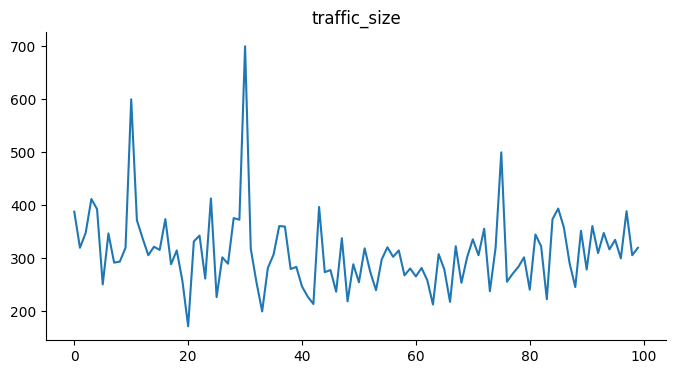

In [ ]:
# @title traffic_size

from matplotlib import pyplot as plt
data['traffic_size'].plot(kind='line', figsize=(8, 4), title='traffic_size')
plt.gca().spines[['top', 'right']].set_visible(False)

**Preprocess the Data**

**Import the Isolation Forest Model**

In [ ]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.05)  # Adjust contamination level based on anomaly rate

**Train the Model**

In [ ]:
model.fit(data[['traffic_size']])  # Replace 'traffic_size' with your selected column

IsolationForest(contamination=0.05)

**Detect Anomalies**

In [ ]:
data['anomaly'] = model.predict(data[['traffic_size']])

**Display Results**

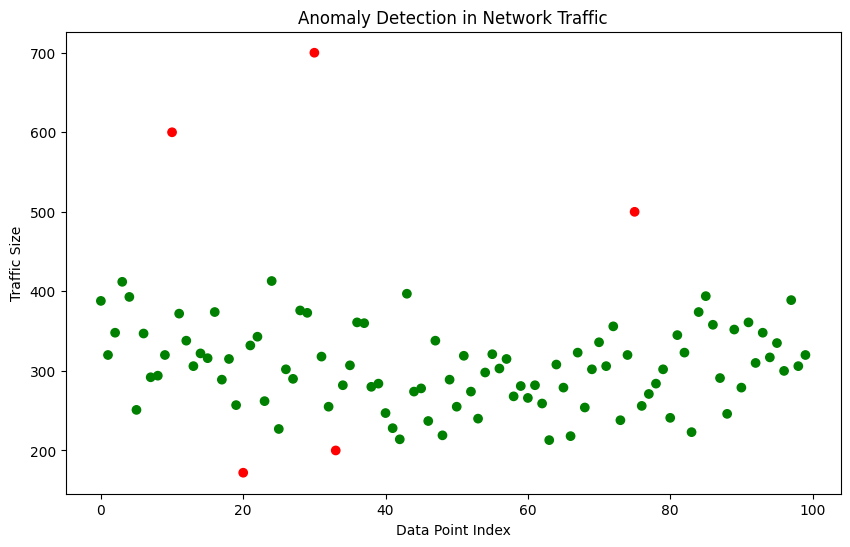

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['traffic_size'], c=data['anomaly'].apply(lambda x: 'red' if x == -1 else 'green'))
plt.title('Anomaly Detection in Network Traffic')
plt.xlabel('Data Point Index')
plt.ylabel('Traffic Size')
plt.show()

**Let's test with new traffic numbers**

In [ ]:
# Test the Isolation Forest model on new input
# Prompt the user to enter a traffic size for testing

new_traffic_size = float(input("Enter a new traffic size value to test for anomaly detection: "))

# Create a DataFrame for the new data point to match model input format
new_data = pd.DataFrame([[new_traffic_size]], columns=['traffic_size'])

# Predict anomaly status for the new traffic size
new_anomaly_prediction = model.predict(new_data)[0]

# Output the result
if new_anomaly_prediction == -1:
    print("Result: This traffic size is classified as an anomaly.")
else:
    print("Result: This traffic size is classified as normal.")


#sample input
#600
#310

Enter a new traffic size value to test for anomaly detection: 600
Result: This traffic size is classified as an anomaly.
